In [19]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot

In [16]:
df = pd.read_csv("covid-testing-all-observations.csv")

In [32]:
df['Entity'] = df['Entity'].apply(lambda x: x.split('-')[0].strip())

In [33]:
country_list = ['Slovenia', 'Spain', 'Switzerland', 'Taiwan', 'Thailand',
       'United Kingdom', 'United States', 'Viet Nam', 'Canada', 'China',
       'Germany', 'Hong Kong',
       'Italy', 'Ireland', 'Singapore', 'France', 'Romania',
       'Australia', 'Belgium', 'Brazil', 'Malaysia', 'Kuwait']

In [34]:
df['filter'] = df['Entity'].apply(lambda x: True if x in country_list else False)

In [42]:
df.head()

,Entity,Date,Source URL,Source label,Notes,Cumulative total,Daily change in cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,3-day rolling mean daily change,3-day rolling mean daily change per thousand,7-day rolling mean daily change,7-day rolling mean daily change per thousand,filter
22,Australia,2020-03-22,https://doi.org/10.33321/cdi.2020.44.28,Australian Government Department of Health,NaN,143056,NaN,5.610,NaN,NaN,NaN,NaN,NaN,True
23,Australia,2020-03-29,https://doi.org/10.33321/cdi.2020.44.29,Australian Government Department of Health,NaN,211261,NaN,8.285,NaN,NaN,NaN,NaN,NaN,True
24,Australia,2020-04-05,https://www.health.gov.au/sites/default/files/...,Australian Government Department of Health,NaN,297154,NaN,11.653,NaN,NaN,NaN,NaN,NaN,True
25,Australia,2020-04-06,https://www.health.gov.au/sites/default/files/...,Australian Government Department of Health,NaN,302663,5509.0,11.869,0.216,NaN,NaN,NaN,NaN,True
26,Australia,2020-04-07,https://www.health.gov.au/sites/default/files/...,Australian Government Department of Health,NaN,310700,8037.0,12.184,0.315,NaN,NaN,NaN,NaN,True


In [40]:
df = df[(df['filter']) & (df['Date']>'2020-02-28')]

#### Covid cases around the world

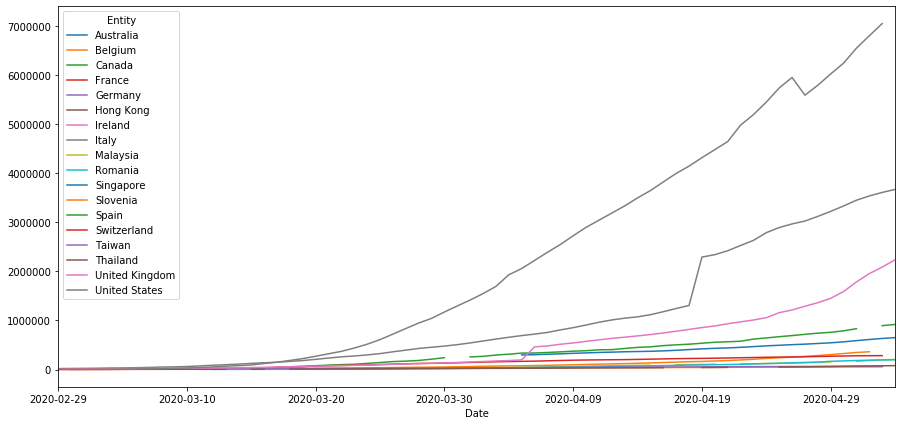

In [41]:
fig, ax = pyplot.subplots(figsize=(15,7))
df.groupby(['Date','Entity']).sum()['Cumulative total'].unstack().plot(ax=ax)

#### Covid Cases in the US

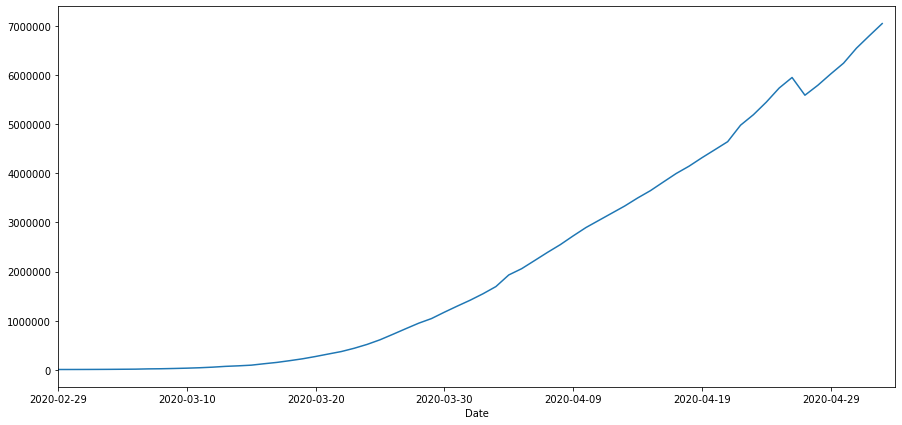

In [43]:
fig, ax = pyplot.subplots(figsize=(15,7))
df.groupby(['Date','Entity']).sum()['Cumulative total'].unstack()['United States'].plot(ax=ax)